![](https://img.shields.io/badge/CNES_AVISO-Contribution-%20?color=grey&labelColor=blue)


# Search Swot

This notebook explains how to search half orbits matching with a geographical area.

To run this notebook you will need to download the swath geometries geojson files : [Science phase geometries](https://github.com/SWOT-community/SWOT-Oceanography/blob/main/KaRIn_2kms_science_geometries.geojson) and [Cal/Val phase geometries](https://github.com/SWOT-community/SWOT-Oceanography/blob/main/KaRIn_2kms_calval_geometries.geojson)

## Tutorial Objectives
* Get the half orbits numbers that intersect with a geographical area.

## Import + code



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import geopandas as gpd
from shapely import geometry

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [4]:
def get_half_orbits_intersect(bbox) -> gpd.GeoDataFrame:
    """Get half orbits that intersect a bounding box.

    Parameters
    ----------
    bbox: 
        the bounding box
        
    Returns
    -------
     gpd.GeoDataFrame:
        A Geopandas dataframe containing intersecting half orbits numbers and geometries
    """
    swath_geometries = gpd.read_file(GEOMETRIES_FILE)

    bbox_polygon = geometry.box(*bbox)

    def _filter_intersect(row, polygon):
        half_orbit_polygon = row.geometry
        return polygon.intersects(half_orbit_polygon)

    select = swath_geometries.apply(_filter_intersect, polygon=bbox_polygon, axis=1)
    return swath_geometries[select]

In [13]:
def plot_geometries(geometries, title):
    fig, ax = plt.subplots(ncols=1, subplot_kw={'projection': ccrs.PlateCarree()})

    gpd.GeoSeries(geometries.geometry).plot(ax=ax,transform=ccrs.PlateCarree(),alpha=1)

    ax.legend(loc="best")
    ax.set_title(title)
    ax.coastlines()

## Parameters

Define a geographical area

In [ ]:
# Noumea
bbox = [162.6, -23.6, 168.5, -19.3]

In [ ]:
# Mediterranean sea
bbox = [6, 39.6, 11, 42]

Define the phase

In [7]:
# science, calval
phase = 'science'

Define the geometries file's path to use

In [8]:
GEOMETRIES_FILE = f'KaRIn_2kms_{phase}_geometries.geojson'

## Search for matching half orbits

In [9]:
swath_geoms = get_half_orbits_intersect(bbox)

In [11]:
swath_geoms

,pass_number,geometry
0,1,"POLYGON ((-83.37130 -77.05377, -82.41365 -77.0..."
28,29,"POLYGON ((-85.83706 -77.05377, -84.87940 -77.0..."
235,236,"POLYGON ((-65.48095 78.27207, -64.06949 78.268..."
250,251,"POLYGON ((-79.67267 -77.05377, -78.71502 -77.0..."
263,264,"POLYGON ((-67.94671 78.27207, -67.15265 78.270..."
278,279,"POLYGON ((-82.13843 -77.05377, -81.18077 -77.0..."
291,292,"POLYGON ((-70.41246 78.27207, -69.00100 78.268..."
306,307,"POLYGON ((-84.60418 -77.05377, -83.64652 -77.0..."
513,514,"POLYGON ((-64.24808 78.27207, -63.45402 78.270..."
541,542,"POLYGON ((-66.71383 78.27207, -65.30237 78.268..."


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


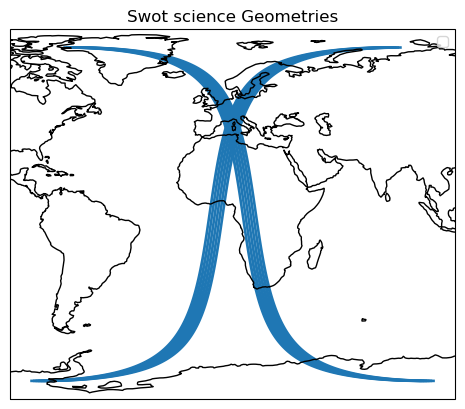

In [14]:
plot_geometries(swath_geoms, f"Swot {phase} Geometries")

In [17]:
half_orbits = list(swath_geoms['pass_number'])
half_orbits

[1, 29, 236, 251, 264, 279, 292, 307, 514, 542, 557, 570]